In [14]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Training Dataset: https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip

In [2]:
!wget http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_train.tar.gz

--2022-12-01 17:35:14--  http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_train.tar.gz
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46907822 (45M) [application/x-gzip]
Saving to: ‘rmastif_train.tar.gz’

rmastif_train.tar.g 100%[===================>]  44.73M  43.5MB/s    in 1.0s    

2022-12-01 17:35:15 (43.5 MB/s) - ‘rmastif_train.tar.gz’ saved [46907822/46907822]



Test Dataset: https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

In [3]:
!wget http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_test.tar.gz

--2022-12-01 17:35:16--  http://www.zemris.fer.hr/~kalfa/Datasets/rMASTIF/rmastif_test.tar.gz
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21169167 (20M) [application/x-gzip]
Saving to: ‘rmastif_test.tar.gz’

rmastif_test.tar.gz 100%[===================>]  20.19M  33.4MB/s    in 0.6s    

2022-12-01 17:35:17 (33.4 MB/s) - ‘rmastif_test.tar.gz’ saved [21169167/21169167]



In [ ]:
!tar -xvf /content/rmastif_test.tar.gz -C /content/Testing

In [6]:
!tar -xvf /content/rmastif_train.tar.gz -C /content/Training

00000/
00000/00016_00000.ppm
00000/00004_00000.ppm
00000/00006_00000.ppm
00000/00005_00001.ppm
00000/00014_00000.ppm
00000/00002_00002.ppm
00000/00008_00003.ppm
00000/00004_00002.ppm
00000/00012_00002.ppm
00000/00012_00003.ppm
00000/00010_00000.ppm
00000/00020_00001.ppm
00000/00008_00001.ppm
00000/00009_00001.ppm
00000/00002_00003.ppm
00000/00010_00002.ppm
00000/00003_00003.ppm
00000/00014_00001.ppm
00000/00003_00000.ppm
00000/00009_00002.ppm
00000/00019_00000.ppm
00000/00018_00002.ppm
00000/00001_00002.ppm
00000/00021_00003.ppm
00000/00005_00000.ppm
00000/00015_00000.ppm
00000/00006_00002.ppm
00000/00012_00000.ppm
00000/00018_00001.ppm
00000/00000_00001.ppm
00000/00021_00002.ppm
00000/00019_00002.ppm
00000/00013_00002.ppm
00000/00020_00002.ppm
00000/00005_00003.ppm
00000/00015_00003.ppm
00000/00017_00003.ppm
00000/00018_00003.ppm
00000/00010_00003.ppm
00000/00016_00003.ppm
00000/00010_00001.ppm
00000/00019_00001.ppm
00000/00009_00003.ppm
00000/00007_00001.ppm
00000/00007_00002.ppm
000

Traindata & TestData Variables

In [ ]:
!rm -rf /content/Testing/00052

In [15]:
import torchvision
test_path = '/content/Testing'
train_path = '/content/Training'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomAutocontrast(),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


data = torchvision.datasets.ImageFolder(root=train_path, transform=preprocess)

#train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True,  num_workers=0)

# train_size = int(0.8 * len(data))
# test_size = len(data) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(data, [train_size, test_size])


#train_data = torchvision.datasets.ImageFolder(root=train_path,transform=preprocess)
train_dataLoader = torch.utils.data.DataLoader(data, batch_size=128, shuffle=True,  num_workers=0)
print('Train',len(data))

test_data = torchvision.datasets.ImageFolder(root=test_path,transform=preprocess)
#print('TEST',len(test_dataset))
print('TEST',len(test_data))
#test_dataLoader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True,  num_workers=0)
test_dataLoader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True,  num_workers=0)


Train 4044
TEST 1784


Hyper Parameters

In [16]:
num_classes = 31
num_epochs = 30
batch_size = 128
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
if torch.cuda.is_available():
    model.cuda()

cuda


In [17]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [18]:
import time
start_time = time.time()
total_step = len(train_dataLoader)
accuracy_list = []

steps_list = []
train_loss = []
train_accuracy = []
train_loss = []

for epoch in range(num_epochs):
  for i, data in enumerate(train_dataLoader):
    images, labels = data[0].to(device), data[1].to(device)

    #Forward Pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backpropogation and Optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Train Accuracy
    total = labels.size(0)
    _, predicted = torch.max(outputs.data,1)

    correct = (predicted == labels).sum().item()
    
    steps = i + 1
    accuracy = (correct / total) * 100
    accuracy_list.append(accuracy)
    steps_list.append(steps)
    train_loss.append(loss.item())
    print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch + 1, num_epochs, steps, total_step, loss.item(),
          accuracy))
    
    

print("######## Training Finished in {} seconds ###########".format(time.time()-start_time))
print("Accuracy List: ",accuracy_list, "Steps List: ",steps_list)

Epoch [1/30], Step [1/32], Loss: 6.9097, Accuracy: 0.00%
Epoch [1/30], Step [2/32], Loss: 4.5384, Accuracy: 10.16%
Epoch [1/30], Step [3/32], Loss: 6.2651, Accuracy: 8.59%
Epoch [1/30], Step [4/32], Loss: 10.7791, Accuracy: 10.16%
Epoch [1/30], Step [5/32], Loss: 5.8390, Accuracy: 3.12%
Epoch [1/30], Step [6/32], Loss: 6.2841, Accuracy: 6.25%
Epoch [1/30], Step [7/32], Loss: 5.3292, Accuracy: 6.25%
Epoch [1/30], Step [8/32], Loss: 4.3874, Accuracy: 3.91%
Epoch [1/30], Step [9/32], Loss: 4.2219, Accuracy: 4.69%
Epoch [1/30], Step [10/32], Loss: 4.2928, Accuracy: 5.47%
Epoch [1/30], Step [11/32], Loss: 4.0398, Accuracy: 2.34%
Epoch [1/30], Step [12/32], Loss: 3.8873, Accuracy: 7.03%
Epoch [1/30], Step [13/32], Loss: 3.7568, Accuracy: 4.69%
Epoch [1/30], Step [14/32], Loss: 4.0837, Accuracy: 4.69%
Epoch [1/30], Step [15/32], Loss: 3.7799, Accuracy: 7.03%
Epoch [1/30], Step [16/32], Loss: 3.6476, Accuracy: 8.59%
Epoch [1/30], Step [17/32], Loss: 3.7684, Accuracy: 7.81%
Epoch [1/30], Step [

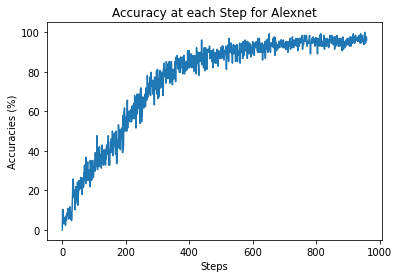

In [19]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Accuracy at each Step for Alexnet")
pyplot.xlabel("Steps")
pyplot.ylabel("Accuracies (%)")
pyplot.plot(accuracy_list)

pyplot.show()

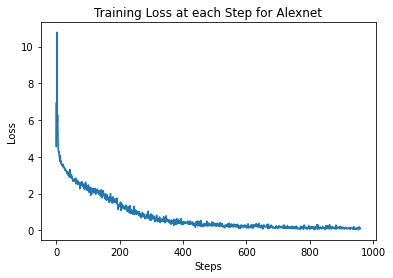

In [20]:
import matplotlib.pyplot as pyplot
import numpy as np

x_axis = np.array(steps_list)
y_axis = np.array(accuracy_list)

pyplot.title("Training Loss at each Step for Alexnet")
pyplot.xlabel("Steps")
pyplot.ylabel("Loss")
pyplot.plot(train_loss)

pyplot.show()

In [28]:
from torch.autograd import Variable
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []
import torch.nn.functional as F

pred_y = []
lable_given_img = []

def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0
    total = 0
    for data, target in data_loader:
       
        data, target = Variable(data, volatile=True), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)

        loss += F.cross_entropy(output, target, size_average=False).item()
        pred = torch.max(output.data, 1)[1]
        #print(pred)
        total += len(data)

        for i in pred :
          pred_y.append(i.abs().tolist())
        for i in target :
          lable_given_img.append(i.abs().tolist())
        correct += (pred == target).sum()

    loss /= len(data_loader.dataset)
    test_loss.append(loss)    
    test_accuracy.append(100 * correct / total)
    print('\nAverage Validation loss: {:.5f}\tAccuracy: {} %'.format(loss, 100 * correct / total))
    print('correct:',correct)

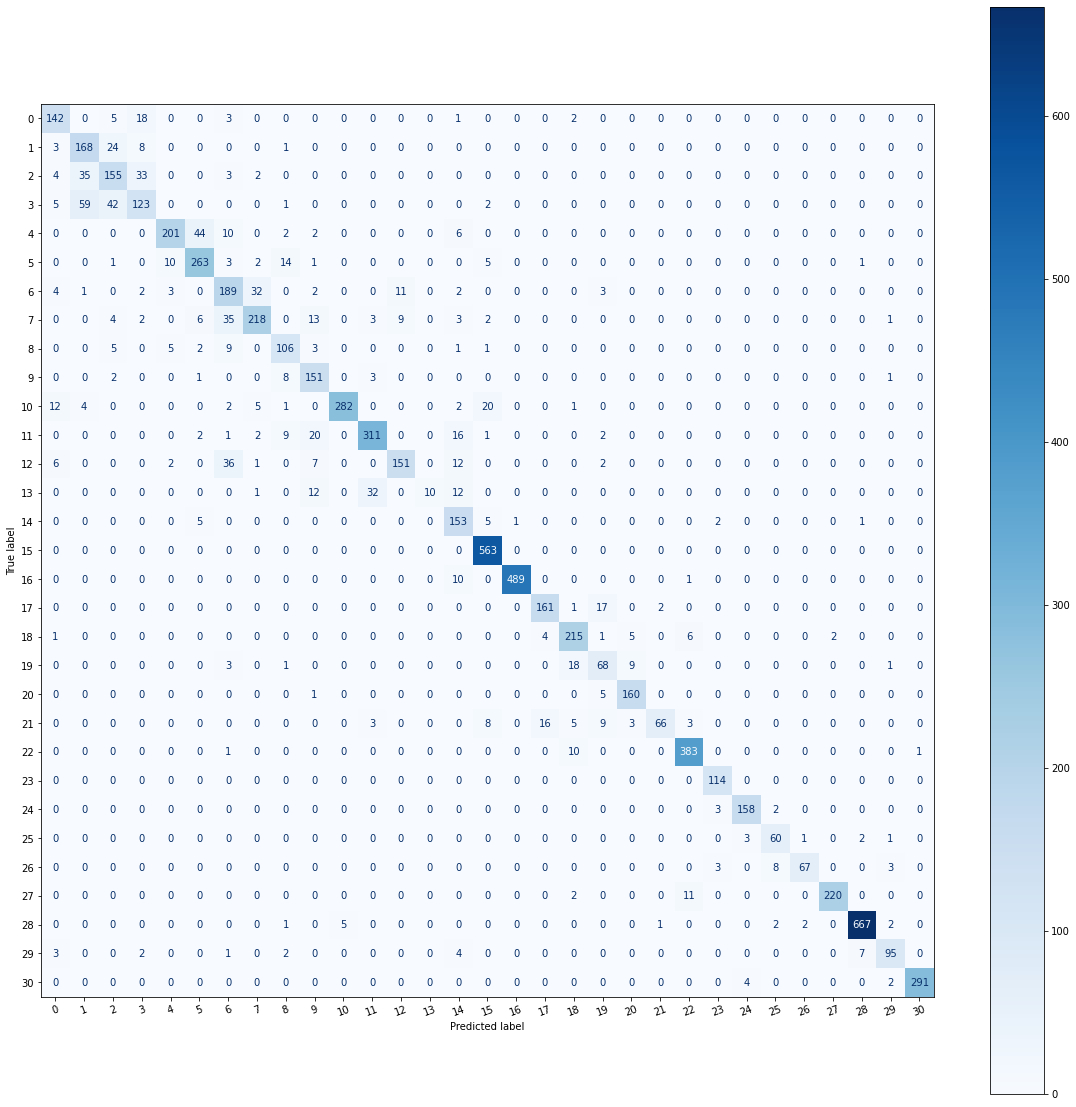

In [24]:
# Print confusion matrix
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_confusion_matrix(labels, pred_labels, classes):
    
    fig = plt.figure(figsize = (20, 20));
    ax = fig.add_subplot(1, 1, 1);
    cm = confusion_matrix(labels, pred_labels);
    cm = ConfusionMatrixDisplay(cm, display_labels = classes);
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
    plt.xticks(rotation = 20)
    
labels_arr = range(0, num_classes)
plot_confusion_matrix(lable_given_img, pred_y, labels_arr)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(lable_given_img, pred_y))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       171
           1       0.63      0.82      0.71       204
           2       0.65      0.67      0.66       232
           3       0.65      0.53      0.59       232
           4       0.91      0.76      0.83       265
           5       0.81      0.88      0.84       300
           6       0.64      0.76      0.69       249
           7       0.83      0.74      0.78       296
           8       0.73      0.80      0.76       132
           9       0.71      0.91      0.80       166
          10       0.98      0.86      0.92       329
          11       0.88      0.85      0.87       364
          12       0.88      0.70      0.78       217
          13       1.00      0.15      0.26        67
          14       0.69      0.92      0.79       167
          15       0.93      1.00      0.96       563
          16       1.00      0.98      0.99       500
          17       0.89    

In [29]:
for epoch in range(2):
  evaluate(test_dataLoader)

<ipython-input-28-715511f5f83d>:18: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Validation loss: 0.58786	Accuracy: 86.99552154541016 %
correct: tensor(1552, device='cuda:0')

Average Validation loss: 0.54717	Accuracy: 86.88341522216797 %
correct: tensor(1550, device='cuda:0')


In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

for images, _ in test_dataLoader:
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=8).permute((1, 2, 0)))
    break

In [30]:
PATH = '/content/Alex_rMastif.pt'
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss,
            'accuracy': accuracy_list,
            'test_loss': test_loss,
            'test_accuracy':test_accuracy
            }, PATH)